# Load the dataset 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/Divya/Downloads/classification dataset.csv")

In [2]:
df.head()

,Age,Gender,Income,Education_Level,Employment_Status,Credit_Score,Owns_House,Car_Ownership,Target
0,67,Other,58781,Bachelor's,Self-Employed,653,No,Yes,Approved
1,33,Female,38270,High School,Employed,380,Yes,No,Approved
2,64,Other,93364,High School,Self-Employed,391,Yes,No,Denied
3,22,Male,46767,High School,Self-Employed,659,Yes,Yes,Approved
4,29,Male,44750,Master's,Employed,415,No,No,Approved


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1000 non-null   int64 
 1   Gender             1000 non-null   object
 2   Income             1000 non-null   int64 
 3   Education_Level    1000 non-null   object
 4   Employment_Status  1000 non-null   object
 5   Credit_Score       1000 non-null   int64 
 6   Owns_House         1000 non-null   object
 7   Car_Ownership      1000 non-null   object
 8   Target             1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


# Encoding the variables

In [4]:
# Encode categorical variables using Label Encoding for simplicity
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Encode all categorical columns (excluding the target variable for now)
categorical_cols = ['Gender', 'Education_Level', 'Employment_Status', 'Owns_House', 'Car_Ownership']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Transform categorical data into numeric
    label_encoders[col] = le  # Store the encoder for potential inverse transformation

In [5]:
# Encode the target variable (Approved = 1, Denied = 0)
df['Target'] = LabelEncoder().fit_transform(df['Target'])
df.head()

,Age,Gender,Income,Education_Level,Employment_Status,Credit_Score,Owns_House,Car_Ownership,Target
0,67,2,58781,0,1,653,0,1,0
1,33,0,38270,1,0,380,1,0,0
2,64,2,93364,1,1,391,1,0,1
3,22,1,46767,1,1,659,1,1,0
4,29,1,44750,2,0,415,0,0,0


# Splitting the Data into Training & Testing Sets

In [6]:
# Split dataset into features and target variable
from sklearn.model_selection import train_test_split

In [7]:
# Define features and target variable
X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target

In [8]:
X

,Age,Gender,Income,Education_Level,Employment_Status,Credit_Score,Owns_House,Car_Ownership
0,67,2,58781,0,1,653,0,1
1,33,0,38270,1,0,380,1,0
2,64,2,93364,1,1,391,1,0
3,22,1,46767,1,1,659,1,1
4,29,1,44750,2,0,415,0,0
...,...,...,...,...,...,...,...,...
995,31,2,44487,1,3,804,1,1
996,34,0,97048,3,2,415,0,0
997,20,0,73187,2,1,713,0,1
998,70,1,33899,3,0,486,0,1


In [9]:
y

0      0
1      0
2      1
3      0
4      0
      ..
995    1
996    1
997    0
998    1
999    0
Name: Target, Length: 1000, dtype: int32

In [10]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
X_train

,Age,Gender,Income,Education_Level,Employment_Status,Credit_Score,Owns_House,Car_Ownership
82,54,1,103593,3,1,488,0,1
991,42,0,33591,3,1,631,0,1
789,70,2,97002,0,1,352,1,0
894,46,1,112756,2,0,678,0,0
398,68,0,22416,1,3,434,0,0
...,...,...,...,...,...,...,...,...
106,45,0,67310,3,3,350,1,1
270,37,0,33941,3,2,618,1,0
860,23,1,72932,2,1,847,1,0
435,62,0,32064,2,2,630,0,0


In [12]:
X_test

,Age,Gender,Income,Education_Level,Employment_Status,Credit_Score,Owns_House,Car_Ownership
521,58,1,98887,2,3,706,0,0
737,32,0,102098,3,0,804,0,1
740,66,2,40872,1,2,381,1,0
660,49,2,26236,2,0,477,0,1
411,18,2,110640,2,1,440,1,1
...,...,...,...,...,...,...,...,...
109,55,0,35415,0,2,398,0,1
430,38,0,59037,2,2,342,1,0
77,55,2,38938,1,2,819,1,1
84,42,0,36262,2,3,590,0,1


In [13]:
y_train

82     1
991    0
789    0
894    0
398    0
      ..
106    1
270    1
860    0
435    0
102    0
Name: Target, Length: 750, dtype: int32

In [14]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
109    0
430    0
77     1
84     1
286    1
Name: Target, Length: 250, dtype: int32

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 8), (250, 8), (750,), (250,))

# AdaBoost 

In [16]:
# Import AdaBoost and evaluation metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
# Initialize and train AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [18]:
y_pred_ada = adaboost_model.predict(X_test)
y_pred_ada

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1])

In [19]:
# Evaluate performance
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_accuracy

0.524

In [20]:
ada_report = classification_report(y_test, y_pred_ada)
print(ada_report)

              precision    recall  f1-score   support

           0       0.50      0.58      0.53       118
           1       0.56      0.48      0.51       132

    accuracy                           0.52       250
   macro avg       0.53      0.53      0.52       250
weighted avg       0.53      0.52      0.52       250



# XGBoost

In [21]:
pip install xgboost

In [22]:
# Import XGBoost classifier
from xgboost import XGBClassifier

In [23]:
xgb_model =  XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [24]:
# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1])

In [25]:
# Evaluate performance
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy}")

XGBoost Accuracy: 0.496


In [26]:
xgb_report = classification_report(y_test, y_pred_xgb)
print("Classification Report:\n", xgb_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.55      0.51       118
           1       0.53      0.45      0.48       132

    accuracy                           0.50       250
   macro avg       0.50      0.50      0.50       250
weighted avg       0.50      0.50      0.50       250



# Light GBM

In [27]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [28]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=100, max_depth=5, learning_rate=0.05, random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 360, number of negative: 390
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 569
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480000 -> initscore=-0.080043
[LightGBM] [Info] Start training from score -0.080043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=0.05, max_depth=5, random_state=42)

In [30]:
y_pred_lgb = lgb_model.predict(X_test)
y_pred_lgb

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1])

In [31]:
# Evaluate performance
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {lgb_accuracy}")

LightGBM Accuracy: 0.52


In [32]:
lgb_report = classification_report(y_test, y_pred_lgb)
print("Classification Report:\n", lgb_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.53      0.51       118
           1       0.55      0.51      0.53       132

    accuracy                           0.52       250
   macro avg       0.52      0.52      0.52       250
weighted avg       0.52      0.52      0.52       250



#  Plot Model Accuracy

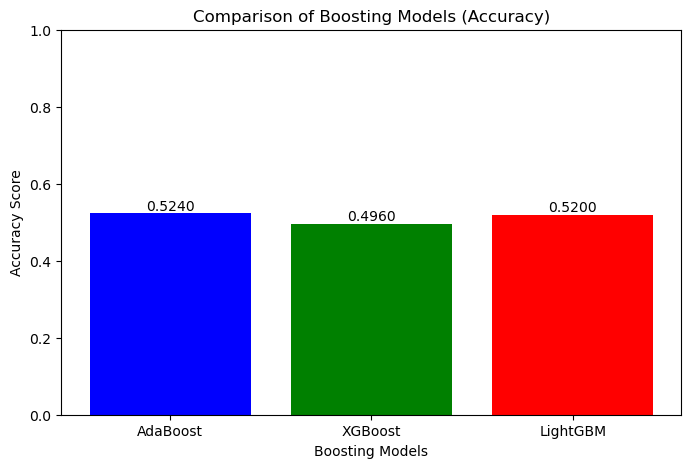

In [33]:
import matplotlib.pyplot as plt

# Accuracy scores of the three models
model_names = ["AdaBoost", "XGBoost", "LightGBM"]
accuracy_scores = [ada_accuracy, xgb_accuracy, lgb_accuracy]

plt.figure(figsize=(8, 5))
bars=plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel("Boosting Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Boosting Models (Accuracy)")
plt.ylim(0, 1)  
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y, f"{y:.4f}", ha='center', va='bottom')

plt.show()

### Relationship Between the Accuracies of AdaBoost, XGBoost, and LightGBM
Each of these boosting models works differently, impacting their accuracy. Here’s how they compare:

Model	Expected Accuracy	Characteristics

AdaBoost: - Lower:: Performs well on simple datasets but struggles with complex data. It assigns higher weights to misclassified samples and improves sequentially.

XGBoost: - Higher:: Optimized with regularization, pruning, and parallelization, making it faster and more accurate than AdaBoost. Handles large datasets well.

LightGBM: - Highest:: More efficient than XGBoost, uses histogram-based learning, and handles large datasets with lower memory usage.

### Interpretation of Accuracy Differences
AdaBoost works well for basic datasets but may underperform on high-dimensional or imbalanced datasets.

XGBoost improves upon AdaBoost by reducing overfitting and handling missing values better.

LightGBM often outperforms both, as it’s optimized for large datasets and faster computations.

### Expected Accuracy Order
🔹 LightGBM ≥ XGBoost > AdaBoost